<a href="https://colab.research.google.com/github/subrotosingha4/machine_learning_projects/blob/main/Red_cross_project_using_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Date: Nov-28-2021
#Author: Subroto Singha

# Project
- To classify the donors based on their various features
- Target varibale: Donor_Indicator

## Dataset
- From American Red Cross supplied by Dallas Data Science Academy

## Project Flow

Data Loading->Exploratory Data Analysis(EDA)->Data Preprocessing: missing value handling,remove noise variables,data imputation,fix imbalance,data normalization->Model Building->Feature Selection:feature importance,remove multicollinearity,principal component analysis,ignore low variance->Train Test Split->Hyperparameter tuning->Model Evaluation->Deploy Model: save model,load model->Model Monitoring: mlflow

# Importing Libraries

In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Loading Data

In [ ]:
# Code snippet 2
## This dataset contain both features and labels
df = pd.read_csv('/content/Red Cross Donation data.csv')
df

,ID,ZIPCODE,AGE,MARITAL_STATUS,GENDER,MEMBERSHIP_IND,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,WEALTH_RATING,DEGREE_LEVEL,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving,TotalGiving,BIRTH_DATE,DONOR_IND
0,1,23187.0,42,Married,Female,N,N,N,N,NaN,NaN,HOME,N,1,$0,$0,$0,$0,$0,$0,10.0,NaN,Y
1,2,77643.0,33,NaN,Female,N,Y,N,Y,NaN,UB,NaN,Y,0,$0,$0,$0,$0,$0,$0,2100.0,6/16/1985,Y
2,3,NaN,42,Married,Female,N,N,N,N,NaN,NaN,HOME,N,1,$0,$0,$0,$0,$0,$200,200.0,NaN,Y
3,4,47141.0,31,NaN,Female,N,Y,N,Y,NaN,NaN,HOME,Y,0,$0,$0,$0,$0,$0,$0,0.0,12/3/1987,N
4,5,92555.0,68,NaN,Female,N,N,N,N,NaN,NaN,HOME,Y,0,$0,$0,$0,$0,$0,$0,505.0,9/11/1950,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,34504,7848.0,42,NaN,Female,N,N,N,N,NaN,NaN,HOME,N,0,$0,$0,$0,$0,$0,$0,0.0,NaN,N
34504,34505,28275.0,24,NaN,Male,N,N,N,N,"$250,000-$499,999",NaN,CAMP,Y,0,$0,$0,$0,$0,$0,$0,80.0,9/23/1994,Y
34505,34506,42539.0,27,NaN,Female,N,Y,N,Y,NaN,UB,HOME,Y,0,$0,$0,$0,$0,$0,$0,0.0,1/3/1991,N
34506,34507,32733.0,46,Married,Female,N,N,N,Y,NaN,NaN,HOME,Y,1,$0,$0,$0,$120,$0,$0,120.0,5/11/1972,Y


# EDA using SweetViz

In [ ]:
# !pip install sweetviz

In [ ]:
# import sweetviz as sv
# sv_report=sv.analyze(df,target_feat='DONOR_IND')
# sv_report.show_html("red cross Report1.html")

# Data Preprocessing


## Missing Value Percentage

- **71%** values are missing in "**MARITAL_STATUS**",**92%** in "**WEALYH_RATING**",**78%** in "**DEGREE_LEVEL**"
- drop the column rather imputation

In [ ]:
df=df.drop(columns=['MARITAL_STATUS','WEALTH_RATING','DEGREE_LEVEL'],axis=0)

## Noise Variables

- drop the noise variables
- ID,ZIPCODE are clear noise variables
- Rest are noise variables since the TotalGiving column has the sum of all giving thus this column solely should carry all the giving information
- PyCaret provides a parameter called ignore variable to simply not consider the features thus rather using Pandas .drop() method use PyCarets ignore varible in setup function later
- Just commented out the .drop() method for reference if pandas will be used in future

In [ ]:
"""df1=df.drop(columns=['ID','ZIPCODE','BIRTH_DATE','PrevFYGiving','PrevFY1Giving','PrevFY2Giving','PrevFY3Giving','PrevFY4Giving','CurrFYGiving'],axis=1) #drop column by row(0) or column(1)
df1.columns"""

"df1=df.drop(columns=['ID','ZIPCODE','BIRTH_DATE','PrevFYGiving','PrevFY1Giving','PrevFY2Giving','PrevFY3Giving','PrevFY4Giving','CurrFYGiving'],axis=1) #drop column by row(0) or column(1)\ndf1.columns"

In [ ]:
"""df1=df.drop(columns=['ID','ZIPCODE'],axis=1) #drop column by row(0) or column(1)
df1.columns"""

"df1=df.drop(columns=['ID','ZIPCODE'],axis=1) #drop column by row(0) or column(1)\ndf1.columns"

In [ ]:
df1=df.copy()

In [ ]:
# Checking the null values list and counts
df1.isnull().sum()

ID                         0
ZIPCODE                   91
AGE                        0
GENDER                   493
MEMBERSHIP_IND             0
ALUMNUS_IND                0
PARENT_IND                 0
HAS_INVOLVEMENT_IND        0
PREF_ADDRESS_TYPE       4043
EMAIL_PRESENT_IND          0
Donor_years                0
PrevFYGiving               0
PrevFY1Giving              0
PrevFY2Giving              0
PrevFY3Giving              0
PrevFY4Giving              0
CurrFYGiving               0
TotalGiving                0
BIRTH_DATE             21190
DONOR_IND                  0
dtype: int64

In [ ]:
# Replacing the missing values with median values
#df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna(0)
#df['GENDER'] = df['GENDER'].fillna(df['GENDER'].median())
#df['WEALTH_RATING'] = df['WEALTH_RATING'].fillna(df['WEALTH_RATING'].median())
#df['DEGREE_LEVEL'] = df['DEGREE_LEVEL'].fillna(df['DEGREE_LEVEL'].median())
#df['PREF_ADDRESS_TYPE'] = df['PREF_ADDRESS_TYPE'].fillna(df['PREF_ADDRESS_TYPE'].median())
#df['BIRTH_DATE'] = df['BIRTH_DATE'].fillna(df['BIRTH_DATE'].median())

# Imputation
- GENDER is categorical thus impute with mode
- Same as GENDER, address type is categorical thus impute with mode

In [ ]:
# Replacing values with mode
"""for column in ['GENDER']:
    df1[column].fillna(df1[column].mode()[0], inplace=True)"""

"for column in ['GENDER']:\n    df1[column].fillna(df1[column].mode()[0], inplace=True)"

In [ ]:
"""for column in ['PREF_ADDRESS_TYPE']:
    df1[column].fillna(df1[column].mode()[0], inplace=True)"""

"for column in ['PREF_ADDRESS_TYPE']:\n    df1[column].fillna(df1[column].mode()[0], inplace=True)"

- check if more missing values

In [ ]:
df1.isnull().sum()

ID                         0
ZIPCODE                   91
AGE                        0
GENDER                   493
MEMBERSHIP_IND             0
ALUMNUS_IND                0
PARENT_IND                 0
HAS_INVOLVEMENT_IND        0
PREF_ADDRESS_TYPE       4043
EMAIL_PRESENT_IND          0
Donor_years                0
PrevFYGiving               0
PrevFY1Giving              0
PrevFY2Giving              0
PrevFY3Giving              0
PrevFY4Giving              0
CurrFYGiving               0
TotalGiving                0
BIRTH_DATE             21190
DONOR_IND                  0
dtype: int64

In [ ]:
df1.head()

,ID,ZIPCODE,AGE,GENDER,MEMBERSHIP_IND,ALUMNUS_IND,PARENT_IND,HAS_INVOLVEMENT_IND,PREF_ADDRESS_TYPE,EMAIL_PRESENT_IND,Donor_years,PrevFYGiving,PrevFY1Giving,PrevFY2Giving,PrevFY3Giving,PrevFY4Giving,CurrFYGiving,TotalGiving,BIRTH_DATE,DONOR_IND
0,1,23187.0,42,Female,N,N,N,N,HOME,N,1,$0,$0,$0,$0,$0,$0,10.0,NaN,Y
1,2,77643.0,33,Female,N,Y,N,Y,NaN,Y,0,$0,$0,$0,$0,$0,$0,2100.0,6/16/1985,Y
2,3,NaN,42,Female,N,N,N,N,HOME,N,1,$0,$0,$0,$0,$0,$200,200.0,NaN,Y
3,4,47141.0,31,Female,N,Y,N,Y,HOME,Y,0,$0,$0,$0,$0,$0,$0,0.0,12/3/1987,N
4,5,92555.0,68,Female,N,N,N,N,HOME,Y,0,$0,$0,$0,$0,$0,$0,505.0,9/11/1950,Y


In [ ]:
df1.dtypes

ID                       int64
ZIPCODE                float64
AGE                      int64
GENDER                  object
MEMBERSHIP_IND          object
ALUMNUS_IND             object
PARENT_IND              object
HAS_INVOLVEMENT_IND     object
PREF_ADDRESS_TYPE       object
EMAIL_PRESENT_IND       object
Donor_years              int64
PrevFYGiving            object
PrevFY1Giving           object
PrevFY2Giving           object
PrevFY3Giving           object
PrevFY4Giving           object
CurrFYGiving            object
TotalGiving            float64
BIRTH_DATE              object
DONOR_IND               object
dtype: object

# Modeling
- using PyCaret

- divide categorical and numeric variables in two lists for pycaret easy implementation 

In [ ]:
cat_var=['AGE','GENDER','MEMBERSHIP_IND','ALUMNUS_IND','PARENT_IND','HAS_INVOLVEMENT_IND','PREF_ADDRESS_TYPE','EMAIL_PRESENT_IND','PrevFYGiving','PrevFY1Giving','PrevFY2Giving','PrevFY3Giving','PrevFY4Giving','CurrFYGiving']
num_var=['Donor_years','TotalGiving']
ign_var=['ID','ZIPCODE','BIRTH_DATE']

In [ ]:
# Install PyCaret
!pip install pycaret --upgrade

     |████████████████████████████████| 288 kB 5.0 MB/s 
     |████████████████████████████████| 113 kB 62.2 MB/s 
     |████████████████████████████████| 2.0 MB 51.8 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 1.7 MB 46.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.9 MB 217 kB/s 
     |████████████████████████████████| 1.3 MB 58.5 MB/s 
     |████████████████████████████████| 261 kB 60.7 MB/s 
     |████████████████████████████████| 167 kB 57.6 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 6.8 MB 11.1 MB/s 
     |████████████████████████████████| 102 kB 9.9 MB/s 
     |████████████████████████████████| 303 kB 73.5 MB/s 
     |████████████████████████████████| 3.1 MB 70.7 MB/s 
     |███████████████████

In [ ]:
#To import all Classification related Pycaret libraries
from pycaret.classification import *

In [ ]:
# Setting up the classification ML experiment
classification_model_setup = setup(df1,  
                                   target = 'DONOR_IND',
                                   ignore_features=ign_var,
                                   categorical_features=cat_var,
                                   categorical_imputation='mode',
                                   numeric_features=num_var,
                                   numeric_imputation='median',
                                   pca=True,
                                   #pca_method='incremental',
                                   remove_outliers=True,
                                   remove_multicollinearity=True,
                                   feature_selection=True,
                                   ignore_low_variance=True,
                                   train_size=0.7,
                                   fold_strategy='kfold',
                                   fold=5,
                                   fix_imbalance=True,
                                   normalize=True)

,Description,Value
0,session_id,1469
1,Target,DONOR_IND
2,Target Type,Binary
3,Label Encoded,"N: 0, Y: 1"
4,Original Data,"(34508, 20)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#PyCaret runs all the algorithms and find best algorithm for the dataset
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9837,0.9962,0.9807,0.9928,0.9867,0.9656,0.9658,0.372
lightgbm,Light Gradient Boosting Machine,0.9785,0.9979,0.9862,0.9790,0.9826,0.9544,0.9544,0.520
et,Extra Trees Classifier,0.9711,0.9969,0.9561,0.9968,0.9760,0.9395,0.9408,1.370
rf,Random Forest Classifier,0.9173,0.9557,0.8697,0.9958,0.9285,0.8316,0.8423,1.966
dt,Decision Tree Classifier,0.8971,0.9418,0.8360,0.9966,0.9092,0.7925,0.8090,0.172
gbc,Gradient Boosting Classifier,0.8301,0.9019,0.8010,0.9129,0.8533,0.6535,0.6615,2.038
ada,Ada Boost Classifier,0.6889,0.7951,0.6376,0.8242,0.7137,0.3843,0.4040,0.810
lr,Logistic Regression,0.5161,0.5832,0.4341,0.6663,0.5242,0.0738,0.0817,0.732
ridge,Ridge Classifier,0.5061,0.0000,0.3886,0.6736,0.4906,0.0741,0.0856,0.114
lda,Linear Discriminant Analysis,0.5061,0.5794,0.3886,0.6736,0.4906,0.0741,0.0856,0.138


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#create the model instance that found as best one 
model = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9821,0.9947,0.9777,0.9936,0.9856,0.9621,0.9623
1,0.9858,0.9973,0.9823,0.9951,0.9886,0.9698,0.9700
2,0.9819,0.9960,0.9792,0.9909,0.9850,0.9622,0.9623
3,0.9828,0.9970,0.9826,0.9893,0.9859,0.9638,0.9638
4,0.9858,0.9961,0.9818,0.9949,0.9883,0.9703,0.9705
Mean,0.9837,0.9962,0.9807,0.9928,0.9867,0.9656,0.9658
SD,0.0018,0.0009,0.0019,0.0023,0.0015,0.0037,0.0037


In [ ]:
#hyperparameter tuning for best model 'knn'
tuned_model = tune_model(model, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9932,0.9937,0.9920,0.9972,0.9946,0.9856,0.9856
1,0.9939,0.9944,0.9924,0.9979,0.9951,0.9870,0.9870
2,0.9930,0.9932,0.9925,0.9960,0.9943,0.9854,0.9854
3,0.9954,0.9955,0.9950,0.9975,0.9963,0.9904,0.9904
4,0.9939,0.9941,0.9932,0.9968,0.9950,0.9872,0.9872
Mean,0.9939,0.9942,0.9930,0.9971,0.9950,0.9871,0.9871
SD,0.0008,0.0008,0.0011,0.0006,0.0007,0.0018,0.0018


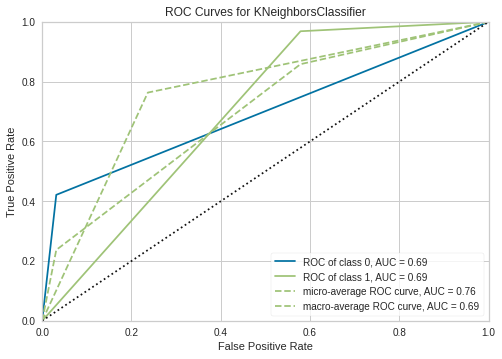

In [ ]:
#plot models performance
plot_model(tuned_model)

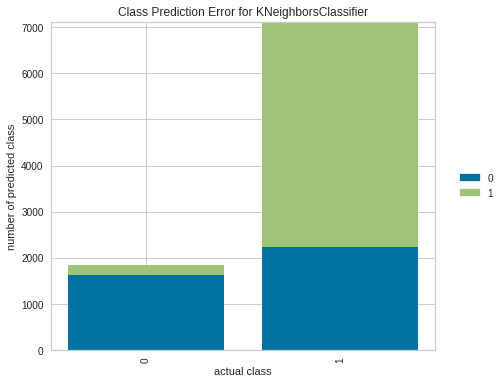

In [ ]:
#plot models error in a bar chart
plot_model(tuned_model, plot = 'error')

In [ ]:
#interactive way to evaluate the model
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# PyCarets AutoML
- one of the ways to find the best algorithm by the package itself

In [ ]:
#instantiate the automl
automl_model = automl(optimize = 'Accuracy')

In [ ]:
#display the best model found by automl
print(automl_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')


In [ ]:
#model evaluation on hold-out dataset
pred_holdouts = predict_model(automl_model)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7634,0.6949,0.9685,0.7362,0.8365,0.4356,0.4937


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,DONOR_IND,Label,Score
0,0.795971,0.525224,-0.520291,0.048206,0.072176,-0.032663,Y,Y,1.0
1,-0.382035,-0.316047,-0.469196,0.670292,-0.021592,-0.271258,N,N,1.0
2,-0.488508,0.430996,0.402931,-0.121995,-0.025267,-0.065791,N,N,1.0
3,-0.409376,-0.150420,0.438500,-0.598718,0.603919,0.111039,Y,Y,1.0
4,0.023240,-0.247814,-0.447022,0.708245,0.013835,-0.256465,Y,Y,1.0


In [ ]:
#save model as a pkl file
save_model(automl_model, model_name='automl-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['AGE', 'GENDER',
                                                             'MEMBERSHIP_IND',
                                                             'ALUMNUS_IND',
                                                             'PARENT_IND',
                                                             'HAS_INVOLVEMENT_IND',
                                                             'PREF_ADDRESS_TYPE',
                                                             'EMAIL_PRESENT_IND',
                                                             'PrevFYGiving',
                                                             'PrevFY1Giving',
                                                             'PrevFY2Giving',
                                                             'PrevFY3Giving',
                                                             'PrevFY4Giving',
    

In [ ]:
#load the model for further use
loaded_model = load_model('automl-model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['AGE', 'GENDER',
                                                            'MEMBERSHIP_IND',
                                                            'ALUMNUS_IND',
                                                            'PARENT_IND',
                                                            'HAS_INVOLVEMENT_IND',
                                                            'PREF_ADDRESS_TYPE',
                                                            'EMAIL_PRESENT_IND',
                                                            'PrevFYGiving',
                                                            'PrevFY1Giving',
                                                            'PrevFY2Giving',
                                                            'PrevFY3Giving',
                                         

In [ ]:
#log and track your machine learning experiments with a machine learning lifecycle tool called MLfLow
#!mlflow ui

[2021-11-28 06:08:16 +0000] [1157] [INFO] Starting gunicorn 20.1.0
[2021-11-28 06:08:16 +0000] [1157] [INFO] Listening at: http://127.0.0.1:5000 (1157)
[2021-11-28 06:08:16 +0000] [1157] [INFO] Using worker: sync
[2021-11-28 06:08:16 +0000] [1160] [INFO] Booting worker with pid: 1160

Aborted!
[2021-11-28 06:08:46 +0000] [1157] [INFO] Handling signal: int
[2021-11-28 06:08:46 +0000] [1160] [INFO] Worker exiting (pid: 1160)
[2021-11-28 06:08:47 +0000] [1157] [INFO] Shutting down: Master


# Project Summary

- **Training accuracy is 98.37	%** by Extra Trees Classifier
- Evaluated trained model on a hold-out data and achieved **testing accuracy 76.34%**
- Therefore, with some Pycaret built-in feature engineering and data preprocessing did the job
- Next we may try the H2O automl if we can improve the accuracy (Future Work) 